In [1]:
import cv2
import sys
import math
import cv2 as cv
from time import sleep
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import numpy as np
import math
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import time 


# ImageCuttingAndLabeling Module

In [10]:
#380*380으로 만들어진 파일들이 /data/resize/에 준비되어있어야한다.
#380*380 image cutting and 파일로 labeling
#모든 파일 숫자별로 10개씩 쪼개고 파일 별 label

#현재 디렉토리 위치 출력
print(os.getcwd() )

#실행시 디렉토리 위치는 실행파일있는 곳으로 하자.


#resized된 파일이 있는곳으로 이동
os.chdir('./data/resize/')


#디렉토리에 있는 파일 출력
print(os.listdir())
files=os.listdir()

#파일에 접근 시작
for idx, file in enumerate(files):
    fname, ext = os.path.splitext(file)
    
    #디렉토리에있는 파일중 jpg,png파일만 읽어들임
    if ext in ['.jpg','.png']:
        path=os.getcwd()
        print(path,file)
        im = Image.open(file)
        
        for i in range(10):
            #해당 Label파일에 cutting된 사진 저장 
            os.chdir(f"./{i}")
            
            for j in range(10):
                #(x,y,x+width,y+height)
                crop_image = im.crop((20+i*34, 20+j*34, 54+i*34 , 54+j*34))
                
                #pixel값에 접근하기 위해 load (crop_image와 연결되어 있어 값을 바꾸기만하면됨)
                load_image=crop_image.load()
                
                #테두리 침식
                for x in [0,1,2,31,32,33]:
                    for y in range(34):
                        try:
                            load_image[x,y]=(255,255,255)
                        except:
                            load_image[x,y]=255
                for y in [0,1,2,31,32,33]:
                     for x in range(34):
                        try:
                            load_image[x,y]=(255,255,255)
                        except:
                            load_image[x,y]=255
                        
                #28*28resize
                crop_image = crop_image.resize((28, 28),Image.LANCZOS)
                
                #gray 변환
                crop_image=crop_image.convert('L')
                
                #
                crop_image.save('Img' + str(idx)+'_'+str(i)+'_'+ str(j) + '.jpg')
                print('Img' + str(idx)+'_'+str(i)+'_'+ str(j) + '.jpg저장')
                
            #모두 잘라낸뒤 resize파일로 돌아가기
            os.chdir("../")
            
# 실행이 끝나면 resize파일이다.
#다시 기본디렉토리로 이동
os.chdir("../")
os.chdir("../")



E:\전민재\전공\3학년\머신러닝\개인작업
['MNIST15resized.jpg', 'MNIST16resized.jpg', 'MNIST17resized.jpg', 'MNIST18resized.jpg', 'MNIST19resized.jpg', 'MNIST20resized.jpg', 'MNIST1111resized.jpg', 'MNIST1resized.jpg', '1resized.jpg', '23resized.jpg', '22resized.jpg', '21resized.jpg', '20resized.jpg', '19resized.jpg', '18resized.jpg', '17resized.jpg', '16resized.jpg', '15resized.jpg', '14resized.jpg', '13resized.jpg', '12resized.jpg', '11resized.jpg', '10resized.jpg', '9resized.jpg', '8resized.jpg', '7resized.jpg', '6resized.jpg', '5resized.jpg', '4resized.jpg', '3resized.jpg', '2resized.jpg', '1resized (2).jpg', '2resized (2).jpg', '3resized (2).jpg', '4resized (2).jpg', '5resized (2).jpg', '6resized (2).jpg', '7resized (2).jpg', '8resized (2).jpg', '9resized (2).jpg', '10resized (2).jpg', '11resized (2).jpg', '12resized (2).jpg', '13resized (2).jpg', '14resized (2).jpg', '15resized (2).jpg', '16resized (2).jpg', '17resized (2).jpg', '18resized (2).jpg', '19resized (2).jpg', '20resized (2).jpg', '21re

Img3_0_2.jpg저장
Img3_0_3.jpg저장
Img3_0_4.jpg저장
Img3_0_5.jpg저장
Img3_0_6.jpg저장
Img3_0_7.jpg저장
Img3_0_8.jpg저장
Img3_0_9.jpg저장
Img3_1_0.jpg저장
Img3_1_1.jpg저장
Img3_1_2.jpg저장
Img3_1_3.jpg저장
Img3_1_4.jpg저장
Img3_1_5.jpg저장
Img3_1_6.jpg저장
Img3_1_7.jpg저장
Img3_1_8.jpg저장
Img3_1_9.jpg저장
Img3_2_0.jpg저장
Img3_2_1.jpg저장
Img3_2_2.jpg저장
Img3_2_3.jpg저장
Img3_2_4.jpg저장
Img3_2_5.jpg저장
Img3_2_6.jpg저장
Img3_2_7.jpg저장
Img3_2_8.jpg저장
Img3_2_9.jpg저장
Img3_3_0.jpg저장
Img3_3_1.jpg저장
Img3_3_2.jpg저장
Img3_3_3.jpg저장
Img3_3_4.jpg저장
Img3_3_5.jpg저장
Img3_3_6.jpg저장
Img3_3_7.jpg저장
Img3_3_8.jpg저장
Img3_3_9.jpg저장
Img3_4_0.jpg저장
Img3_4_1.jpg저장
Img3_4_2.jpg저장
Img3_4_3.jpg저장
Img3_4_4.jpg저장
Img3_4_5.jpg저장
Img3_4_6.jpg저장
Img3_4_7.jpg저장
Img3_4_8.jpg저장
Img3_4_9.jpg저장
Img3_5_0.jpg저장
Img3_5_1.jpg저장
Img3_5_2.jpg저장
Img3_5_3.jpg저장
Img3_5_4.jpg저장
Img3_5_5.jpg저장
Img3_5_6.jpg저장
Img3_5_7.jpg저장
Img3_5_8.jpg저장
Img3_5_9.jpg저장
Img3_6_0.jpg저장
Img3_6_1.jpg저장
Img3_6_2.jpg저장
Img3_6_3.jpg저장
Img3_6_4.jpg저장
Img3_6_5.jpg저장
Img3_6_6.jpg저장
Img3_6_7.jpg저장
Img3_6_8.j

Img8_5_4.jpg저장
Img8_5_5.jpg저장
Img8_5_6.jpg저장
Img8_5_7.jpg저장
Img8_5_8.jpg저장
Img8_5_9.jpg저장
Img8_6_0.jpg저장
Img8_6_1.jpg저장
Img8_6_2.jpg저장
Img8_6_3.jpg저장
Img8_6_4.jpg저장
Img8_6_5.jpg저장
Img8_6_6.jpg저장
Img8_6_7.jpg저장
Img8_6_8.jpg저장
Img8_6_9.jpg저장
Img8_7_0.jpg저장
Img8_7_1.jpg저장
Img8_7_2.jpg저장
Img8_7_3.jpg저장
Img8_7_4.jpg저장
Img8_7_5.jpg저장
Img8_7_6.jpg저장
Img8_7_7.jpg저장
Img8_7_8.jpg저장
Img8_7_9.jpg저장
Img8_8_0.jpg저장
Img8_8_1.jpg저장
Img8_8_2.jpg저장
Img8_8_3.jpg저장
Img8_8_4.jpg저장
Img8_8_5.jpg저장
Img8_8_6.jpg저장
Img8_8_7.jpg저장
Img8_8_8.jpg저장
Img8_8_9.jpg저장
Img8_9_0.jpg저장
Img8_9_1.jpg저장
Img8_9_2.jpg저장
Img8_9_3.jpg저장
Img8_9_4.jpg저장
Img8_9_5.jpg저장
Img8_9_6.jpg저장
Img8_9_7.jpg저장
Img8_9_8.jpg저장
Img8_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 23resized.jpg
Img9_0_0.jpg저장
Img9_0_1.jpg저장
Img9_0_2.jpg저장
Img9_0_3.jpg저장
Img9_0_4.jpg저장
Img9_0_5.jpg저장
Img9_0_6.jpg저장
Img9_0_7.jpg저장
Img9_0_8.jpg저장
Img9_0_9.jpg저장
Img9_1_0.jpg저장
Img9_1_1.jpg저장
Img9_1_2.jpg저장
Img9_1_3.jpg저장
Img9_1_4.jpg저장
Img9_1_5.jpg저장
Img9_1_6.jpg저장
Img9_

Img13_8_1.jpg저장
Img13_8_2.jpg저장
Img13_8_3.jpg저장
Img13_8_4.jpg저장
Img13_8_5.jpg저장
Img13_8_6.jpg저장
Img13_8_7.jpg저장
Img13_8_8.jpg저장
Img13_8_9.jpg저장
Img13_9_0.jpg저장
Img13_9_1.jpg저장
Img13_9_2.jpg저장
Img13_9_3.jpg저장
Img13_9_4.jpg저장
Img13_9_5.jpg저장
Img13_9_6.jpg저장
Img13_9_7.jpg저장
Img13_9_8.jpg저장
Img13_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 18resized.jpg
Img14_0_0.jpg저장
Img14_0_1.jpg저장
Img14_0_2.jpg저장
Img14_0_3.jpg저장
Img14_0_4.jpg저장
Img14_0_5.jpg저장
Img14_0_6.jpg저장
Img14_0_7.jpg저장
Img14_0_8.jpg저장
Img14_0_9.jpg저장
Img14_1_0.jpg저장
Img14_1_1.jpg저장
Img14_1_2.jpg저장
Img14_1_3.jpg저장
Img14_1_4.jpg저장
Img14_1_5.jpg저장
Img14_1_6.jpg저장
Img14_1_7.jpg저장
Img14_1_8.jpg저장
Img14_1_9.jpg저장
Img14_2_0.jpg저장
Img14_2_1.jpg저장
Img14_2_2.jpg저장
Img14_2_3.jpg저장
Img14_2_4.jpg저장
Img14_2_5.jpg저장
Img14_2_6.jpg저장
Img14_2_7.jpg저장
Img14_2_8.jpg저장
Img14_2_9.jpg저장
Img14_3_0.jpg저장
Img14_3_1.jpg저장
Img14_3_2.jpg저장
Img14_3_3.jpg저장
Img14_3_4.jpg저장
Img14_3_5.jpg저장
Img14_3_6.jpg저장
Img14_3_7.jpg저장
Img14_3_8.jpg저장
Img14_3_9.jpg저장
Img14_

Img19_0_1.jpg저장
Img19_0_2.jpg저장
Img19_0_3.jpg저장
Img19_0_4.jpg저장
Img19_0_5.jpg저장
Img19_0_6.jpg저장
Img19_0_7.jpg저장
Img19_0_8.jpg저장
Img19_0_9.jpg저장
Img19_1_0.jpg저장
Img19_1_1.jpg저장
Img19_1_2.jpg저장
Img19_1_3.jpg저장
Img19_1_4.jpg저장
Img19_1_5.jpg저장
Img19_1_6.jpg저장
Img19_1_7.jpg저장
Img19_1_8.jpg저장
Img19_1_9.jpg저장
Img19_2_0.jpg저장
Img19_2_1.jpg저장
Img19_2_2.jpg저장
Img19_2_3.jpg저장
Img19_2_4.jpg저장
Img19_2_5.jpg저장
Img19_2_6.jpg저장
Img19_2_7.jpg저장
Img19_2_8.jpg저장
Img19_2_9.jpg저장
Img19_3_0.jpg저장
Img19_3_1.jpg저장
Img19_3_2.jpg저장
Img19_3_3.jpg저장
Img19_3_4.jpg저장
Img19_3_5.jpg저장
Img19_3_6.jpg저장
Img19_3_7.jpg저장
Img19_3_8.jpg저장
Img19_3_9.jpg저장
Img19_4_0.jpg저장
Img19_4_1.jpg저장
Img19_4_2.jpg저장
Img19_4_3.jpg저장
Img19_4_4.jpg저장
Img19_4_5.jpg저장
Img19_4_6.jpg저장
Img19_4_7.jpg저장
Img19_4_8.jpg저장
Img19_4_9.jpg저장
Img19_5_0.jpg저장
Img19_5_1.jpg저장
Img19_5_2.jpg저장
Img19_5_3.jpg저장
Img19_5_4.jpg저장
Img19_5_5.jpg저장
Img19_5_6.jpg저장
Img19_5_7.jpg저장
Img19_5_8.jpg저장
Img19_5_9.jpg저장
Img19_6_0.jpg저장
Img19_6_1.jpg저장
Img19_6_2.jpg저장
Img19_6_

Img24_0_9.jpg저장
Img24_1_0.jpg저장
Img24_1_1.jpg저장
Img24_1_2.jpg저장
Img24_1_3.jpg저장
Img24_1_4.jpg저장
Img24_1_5.jpg저장
Img24_1_6.jpg저장
Img24_1_7.jpg저장
Img24_1_8.jpg저장
Img24_1_9.jpg저장
Img24_2_0.jpg저장
Img24_2_1.jpg저장
Img24_2_2.jpg저장
Img24_2_3.jpg저장
Img24_2_4.jpg저장
Img24_2_5.jpg저장
Img24_2_6.jpg저장
Img24_2_7.jpg저장
Img24_2_8.jpg저장
Img24_2_9.jpg저장
Img24_3_0.jpg저장
Img24_3_1.jpg저장
Img24_3_2.jpg저장
Img24_3_3.jpg저장
Img24_3_4.jpg저장
Img24_3_5.jpg저장
Img24_3_6.jpg저장
Img24_3_7.jpg저장
Img24_3_8.jpg저장
Img24_3_9.jpg저장
Img24_4_0.jpg저장
Img24_4_1.jpg저장
Img24_4_2.jpg저장
Img24_4_3.jpg저장
Img24_4_4.jpg저장
Img24_4_5.jpg저장
Img24_4_6.jpg저장
Img24_4_7.jpg저장
Img24_4_8.jpg저장
Img24_4_9.jpg저장
Img24_5_0.jpg저장
Img24_5_1.jpg저장
Img24_5_2.jpg저장
Img24_5_3.jpg저장
Img24_5_4.jpg저장
Img24_5_5.jpg저장
Img24_5_6.jpg저장
Img24_5_7.jpg저장
Img24_5_8.jpg저장
Img24_5_9.jpg저장
Img24_6_0.jpg저장
Img24_6_1.jpg저장
Img24_6_2.jpg저장
Img24_6_3.jpg저장
Img24_6_4.jpg저장
Img24_6_5.jpg저장
Img24_6_6.jpg저장
Img24_6_7.jpg저장
Img24_6_8.jpg저장
Img24_6_9.jpg저장
Img24_7_0.jpg저장
Img24_7_

Img29_2_2.jpg저장
Img29_2_3.jpg저장
Img29_2_4.jpg저장
Img29_2_5.jpg저장
Img29_2_6.jpg저장
Img29_2_7.jpg저장
Img29_2_8.jpg저장
Img29_2_9.jpg저장
Img29_3_0.jpg저장
Img29_3_1.jpg저장
Img29_3_2.jpg저장
Img29_3_3.jpg저장
Img29_3_4.jpg저장
Img29_3_5.jpg저장
Img29_3_6.jpg저장
Img29_3_7.jpg저장
Img29_3_8.jpg저장
Img29_3_9.jpg저장
Img29_4_0.jpg저장
Img29_4_1.jpg저장
Img29_4_2.jpg저장
Img29_4_3.jpg저장
Img29_4_4.jpg저장
Img29_4_5.jpg저장
Img29_4_6.jpg저장
Img29_4_7.jpg저장
Img29_4_8.jpg저장
Img29_4_9.jpg저장
Img29_5_0.jpg저장
Img29_5_1.jpg저장
Img29_5_2.jpg저장
Img29_5_3.jpg저장
Img29_5_4.jpg저장
Img29_5_5.jpg저장
Img29_5_6.jpg저장
Img29_5_7.jpg저장
Img29_5_8.jpg저장
Img29_5_9.jpg저장
Img29_6_0.jpg저장
Img29_6_1.jpg저장
Img29_6_2.jpg저장
Img29_6_3.jpg저장
Img29_6_4.jpg저장
Img29_6_5.jpg저장
Img29_6_6.jpg저장
Img29_6_7.jpg저장
Img29_6_8.jpg저장
Img29_6_9.jpg저장
Img29_7_0.jpg저장
Img29_7_1.jpg저장
Img29_7_2.jpg저장
Img29_7_3.jpg저장
Img29_7_4.jpg저장
Img29_7_5.jpg저장
Img29_7_6.jpg저장
Img29_7_7.jpg저장
Img29_7_8.jpg저장
Img29_7_9.jpg저장
Img29_8_0.jpg저장
Img29_8_1.jpg저장
Img29_8_2.jpg저장
Img29_8_3.jpg저장
Img29_8_

Img34_2_3.jpg저장
Img34_2_4.jpg저장
Img34_2_5.jpg저장
Img34_2_6.jpg저장
Img34_2_7.jpg저장
Img34_2_8.jpg저장
Img34_2_9.jpg저장
Img34_3_0.jpg저장
Img34_3_1.jpg저장
Img34_3_2.jpg저장
Img34_3_3.jpg저장
Img34_3_4.jpg저장
Img34_3_5.jpg저장
Img34_3_6.jpg저장
Img34_3_7.jpg저장
Img34_3_8.jpg저장
Img34_3_9.jpg저장
Img34_4_0.jpg저장
Img34_4_1.jpg저장
Img34_4_2.jpg저장
Img34_4_3.jpg저장
Img34_4_4.jpg저장
Img34_4_5.jpg저장
Img34_4_6.jpg저장
Img34_4_7.jpg저장
Img34_4_8.jpg저장
Img34_4_9.jpg저장
Img34_5_0.jpg저장
Img34_5_1.jpg저장
Img34_5_2.jpg저장
Img34_5_3.jpg저장
Img34_5_4.jpg저장
Img34_5_5.jpg저장
Img34_5_6.jpg저장
Img34_5_7.jpg저장
Img34_5_8.jpg저장
Img34_5_9.jpg저장
Img34_6_0.jpg저장
Img34_6_1.jpg저장
Img34_6_2.jpg저장
Img34_6_3.jpg저장
Img34_6_4.jpg저장
Img34_6_5.jpg저장
Img34_6_6.jpg저장
Img34_6_7.jpg저장
Img34_6_8.jpg저장
Img34_6_9.jpg저장
Img34_7_0.jpg저장
Img34_7_1.jpg저장
Img34_7_2.jpg저장
Img34_7_3.jpg저장
Img34_7_4.jpg저장
Img34_7_5.jpg저장
Img34_7_6.jpg저장
Img34_7_7.jpg저장
Img34_7_8.jpg저장
Img34_7_9.jpg저장
Img34_8_0.jpg저장
Img34_8_1.jpg저장
Img34_8_2.jpg저장
Img34_8_3.jpg저장
Img34_8_4.jpg저장
Img34_8_

Img39_3_4.jpg저장
Img39_3_5.jpg저장
Img39_3_6.jpg저장
Img39_3_7.jpg저장
Img39_3_8.jpg저장
Img39_3_9.jpg저장
Img39_4_0.jpg저장
Img39_4_1.jpg저장
Img39_4_2.jpg저장
Img39_4_3.jpg저장
Img39_4_4.jpg저장
Img39_4_5.jpg저장
Img39_4_6.jpg저장
Img39_4_7.jpg저장
Img39_4_8.jpg저장
Img39_4_9.jpg저장
Img39_5_0.jpg저장
Img39_5_1.jpg저장
Img39_5_2.jpg저장
Img39_5_3.jpg저장
Img39_5_4.jpg저장
Img39_5_5.jpg저장
Img39_5_6.jpg저장
Img39_5_7.jpg저장
Img39_5_8.jpg저장
Img39_5_9.jpg저장
Img39_6_0.jpg저장
Img39_6_1.jpg저장
Img39_6_2.jpg저장
Img39_6_3.jpg저장
Img39_6_4.jpg저장
Img39_6_5.jpg저장
Img39_6_6.jpg저장
Img39_6_7.jpg저장
Img39_6_8.jpg저장
Img39_6_9.jpg저장
Img39_7_0.jpg저장
Img39_7_1.jpg저장
Img39_7_2.jpg저장
Img39_7_3.jpg저장
Img39_7_4.jpg저장
Img39_7_5.jpg저장
Img39_7_6.jpg저장
Img39_7_7.jpg저장
Img39_7_8.jpg저장
Img39_7_9.jpg저장
Img39_8_0.jpg저장
Img39_8_1.jpg저장
Img39_8_2.jpg저장
Img39_8_3.jpg저장
Img39_8_4.jpg저장
Img39_8_5.jpg저장
Img39_8_6.jpg저장
Img39_8_7.jpg저장
Img39_8_8.jpg저장
Img39_8_9.jpg저장
Img39_9_0.jpg저장
Img39_9_1.jpg저장
Img39_9_2.jpg저장
Img39_9_3.jpg저장
Img39_9_4.jpg저장
Img39_9_5.jpg저장
Img39_9_

Img44_4_3.jpg저장
Img44_4_4.jpg저장
Img44_4_5.jpg저장
Img44_4_6.jpg저장
Img44_4_7.jpg저장
Img44_4_8.jpg저장
Img44_4_9.jpg저장
Img44_5_0.jpg저장
Img44_5_1.jpg저장
Img44_5_2.jpg저장
Img44_5_3.jpg저장
Img44_5_4.jpg저장
Img44_5_5.jpg저장
Img44_5_6.jpg저장
Img44_5_7.jpg저장
Img44_5_8.jpg저장
Img44_5_9.jpg저장
Img44_6_0.jpg저장
Img44_6_1.jpg저장
Img44_6_2.jpg저장
Img44_6_3.jpg저장
Img44_6_4.jpg저장
Img44_6_5.jpg저장
Img44_6_6.jpg저장
Img44_6_7.jpg저장
Img44_6_8.jpg저장
Img44_6_9.jpg저장
Img44_7_0.jpg저장
Img44_7_1.jpg저장
Img44_7_2.jpg저장
Img44_7_3.jpg저장
Img44_7_4.jpg저장
Img44_7_5.jpg저장
Img44_7_6.jpg저장
Img44_7_7.jpg저장
Img44_7_8.jpg저장
Img44_7_9.jpg저장
Img44_8_0.jpg저장
Img44_8_1.jpg저장
Img44_8_2.jpg저장
Img44_8_3.jpg저장
Img44_8_4.jpg저장
Img44_8_5.jpg저장
Img44_8_6.jpg저장
Img44_8_7.jpg저장
Img44_8_8.jpg저장
Img44_8_9.jpg저장
Img44_9_0.jpg저장
Img44_9_1.jpg저장
Img44_9_2.jpg저장
Img44_9_3.jpg저장
Img44_9_4.jpg저장
Img44_9_5.jpg저장
Img44_9_6.jpg저장
Img44_9_7.jpg저장
Img44_9_8.jpg저장
Img44_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 15resized (2).jpg
Img45_0_0.jpg저장
Img45_0_1.jpg저장
Im

Img49_6_7.jpg저장
Img49_6_8.jpg저장
Img49_6_9.jpg저장
Img49_7_0.jpg저장
Img49_7_1.jpg저장
Img49_7_2.jpg저장
Img49_7_3.jpg저장
Img49_7_4.jpg저장
Img49_7_5.jpg저장
Img49_7_6.jpg저장
Img49_7_7.jpg저장
Img49_7_8.jpg저장
Img49_7_9.jpg저장
Img49_8_0.jpg저장
Img49_8_1.jpg저장
Img49_8_2.jpg저장
Img49_8_3.jpg저장
Img49_8_4.jpg저장
Img49_8_5.jpg저장
Img49_8_6.jpg저장
Img49_8_7.jpg저장
Img49_8_8.jpg저장
Img49_8_9.jpg저장
Img49_9_0.jpg저장
Img49_9_1.jpg저장
Img49_9_2.jpg저장
Img49_9_3.jpg저장
Img49_9_4.jpg저장
Img49_9_5.jpg저장
Img49_9_6.jpg저장
Img49_9_7.jpg저장
Img49_9_8.jpg저장
Img49_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 20resized (2).jpg
Img50_0_0.jpg저장
Img50_0_1.jpg저장
Img50_0_2.jpg저장
Img50_0_3.jpg저장
Img50_0_4.jpg저장
Img50_0_5.jpg저장
Img50_0_6.jpg저장
Img50_0_7.jpg저장
Img50_0_8.jpg저장
Img50_0_9.jpg저장
Img50_1_0.jpg저장
Img50_1_1.jpg저장
Img50_1_2.jpg저장
Img50_1_3.jpg저장
Img50_1_4.jpg저장
Img50_1_5.jpg저장
Img50_1_6.jpg저장
Img50_1_7.jpg저장
Img50_1_8.jpg저장
Img50_1_9.jpg저장
Img50_2_0.jpg저장
Img50_2_1.jpg저장
Img50_2_2.jpg저장
Img50_2_3.jpg저장
Img50_2_4.jpg저장
Img50_2_5.jpg저장
Im

Img54_6_5.jpg저장
Img54_6_6.jpg저장
Img54_6_7.jpg저장
Img54_6_8.jpg저장
Img54_6_9.jpg저장
Img54_7_0.jpg저장
Img54_7_1.jpg저장
Img54_7_2.jpg저장
Img54_7_3.jpg저장
Img54_7_4.jpg저장
Img54_7_5.jpg저장
Img54_7_6.jpg저장
Img54_7_7.jpg저장
Img54_7_8.jpg저장
Img54_7_9.jpg저장
Img54_8_0.jpg저장
Img54_8_1.jpg저장
Img54_8_2.jpg저장
Img54_8_3.jpg저장
Img54_8_4.jpg저장
Img54_8_5.jpg저장
Img54_8_6.jpg저장
Img54_8_7.jpg저장
Img54_8_8.jpg저장
Img54_8_9.jpg저장
Img54_9_0.jpg저장
Img54_9_1.jpg저장
Img54_9_2.jpg저장
Img54_9_3.jpg저장
Img54_9_4.jpg저장
Img54_9_5.jpg저장
Img54_9_6.jpg저장
Img54_9_7.jpg저장
Img54_9_8.jpg저장
Img54_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-4.jpg
Img55_0_0.jpg저장
Img55_0_1.jpg저장
Img55_0_2.jpg저장
Img55_0_3.jpg저장
Img55_0_4.jpg저장
Img55_0_5.jpg저장
Img55_0_6.jpg저장
Img55_0_7.jpg저장
Img55_0_8.jpg저장
Img55_0_9.jpg저장
Img55_1_0.jpg저장
Img55_1_1.jpg저장
Img55_1_2.jpg저장
Img55_1_3.jpg저장
Img55_1_4.jpg저장
Img55_1_5.jpg저장
Img55_1_6.jpg저장
Img55_1_7.jpg저장
Img55_1_8.jpg저장
Img55_1_9.jpg저장
Img55_2_0.jpg저장
Img55_2_1.jpg저장
Img55_2_2.jpg저장
Img55_2_3.jpg저장
Img55_2_

Img59_6_2.jpg저장
Img59_6_3.jpg저장
Img59_6_4.jpg저장
Img59_6_5.jpg저장
Img59_6_6.jpg저장
Img59_6_7.jpg저장
Img59_6_8.jpg저장
Img59_6_9.jpg저장
Img59_7_0.jpg저장
Img59_7_1.jpg저장
Img59_7_2.jpg저장
Img59_7_3.jpg저장
Img59_7_4.jpg저장
Img59_7_5.jpg저장
Img59_7_6.jpg저장
Img59_7_7.jpg저장
Img59_7_8.jpg저장
Img59_7_9.jpg저장
Img59_8_0.jpg저장
Img59_8_1.jpg저장
Img59_8_2.jpg저장
Img59_8_3.jpg저장
Img59_8_4.jpg저장
Img59_8_5.jpg저장
Img59_8_6.jpg저장
Img59_8_7.jpg저장
Img59_8_8.jpg저장
Img59_8_9.jpg저장
Img59_9_0.jpg저장
Img59_9_1.jpg저장
Img59_9_2.jpg저장
Img59_9_3.jpg저장
Img59_9_4.jpg저장
Img59_9_5.jpg저장
Img59_9_6.jpg저장
Img59_9_7.jpg저장
Img59_9_8.jpg저장
Img59_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-9.jpg
Img60_0_0.jpg저장
Img60_0_1.jpg저장
Img60_0_2.jpg저장
Img60_0_3.jpg저장
Img60_0_4.jpg저장
Img60_0_5.jpg저장
Img60_0_6.jpg저장
Img60_0_7.jpg저장
Img60_0_8.jpg저장
Img60_0_9.jpg저장
Img60_1_0.jpg저장
Img60_1_1.jpg저장
Img60_1_2.jpg저장
Img60_1_3.jpg저장
Img60_1_4.jpg저장
Img60_1_5.jpg저장
Img60_1_6.jpg저장
Img60_1_7.jpg저장
Img60_1_8.jpg저장
Img60_1_9.jpg저장
Img60_2_0.jpg저장
Img60_2_

Img64_8_2.jpg저장
Img64_8_3.jpg저장
Img64_8_4.jpg저장
Img64_8_5.jpg저장
Img64_8_6.jpg저장
Img64_8_7.jpg저장
Img64_8_8.jpg저장
Img64_8_9.jpg저장
Img64_9_0.jpg저장
Img64_9_1.jpg저장
Img64_9_2.jpg저장
Img64_9_3.jpg저장
Img64_9_4.jpg저장
Img64_9_5.jpg저장
Img64_9_6.jpg저장
Img64_9_7.jpg저장
Img64_9_8.jpg저장
Img64_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-14.jpg
Img65_0_0.jpg저장
Img65_0_1.jpg저장
Img65_0_2.jpg저장
Img65_0_3.jpg저장
Img65_0_4.jpg저장
Img65_0_5.jpg저장
Img65_0_6.jpg저장
Img65_0_7.jpg저장
Img65_0_8.jpg저장
Img65_0_9.jpg저장
Img65_1_0.jpg저장
Img65_1_1.jpg저장
Img65_1_2.jpg저장
Img65_1_3.jpg저장
Img65_1_4.jpg저장
Img65_1_5.jpg저장
Img65_1_6.jpg저장
Img65_1_7.jpg저장
Img65_1_8.jpg저장
Img65_1_9.jpg저장
Img65_2_0.jpg저장
Img65_2_1.jpg저장
Img65_2_2.jpg저장
Img65_2_3.jpg저장
Img65_2_4.jpg저장
Img65_2_5.jpg저장
Img65_2_6.jpg저장
Img65_2_7.jpg저장
Img65_2_8.jpg저장
Img65_2_9.jpg저장
Img65_3_0.jpg저장
Img65_3_1.jpg저장
Img65_3_2.jpg저장
Img65_3_3.jpg저장
Img65_3_4.jpg저장
Img65_3_5.jpg저장
Img65_3_6.jpg저장
Img65_3_7.jpg저장
Img65_3_8.jpg저장
Img65_3_9.jpg저장
Img65_4_0.jpg저장
Img65_4

Img69_8_5.jpg저장
Img69_8_6.jpg저장
Img69_8_7.jpg저장
Img69_8_8.jpg저장
Img69_8_9.jpg저장
Img69_9_0.jpg저장
Img69_9_1.jpg저장
Img69_9_2.jpg저장
Img69_9_3.jpg저장
Img69_9_4.jpg저장
Img69_9_5.jpg저장
Img69_9_6.jpg저장
Img69_9_7.jpg저장
Img69_9_8.jpg저장
Img69_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-19.jpg
Img70_0_0.jpg저장
Img70_0_1.jpg저장
Img70_0_2.jpg저장
Img70_0_3.jpg저장
Img70_0_4.jpg저장
Img70_0_5.jpg저장
Img70_0_6.jpg저장
Img70_0_7.jpg저장
Img70_0_8.jpg저장
Img70_0_9.jpg저장
Img70_1_0.jpg저장
Img70_1_1.jpg저장
Img70_1_2.jpg저장
Img70_1_3.jpg저장
Img70_1_4.jpg저장
Img70_1_5.jpg저장
Img70_1_6.jpg저장
Img70_1_7.jpg저장
Img70_1_8.jpg저장
Img70_1_9.jpg저장
Img70_2_0.jpg저장
Img70_2_1.jpg저장
Img70_2_2.jpg저장
Img70_2_3.jpg저장
Img70_2_4.jpg저장
Img70_2_5.jpg저장
Img70_2_6.jpg저장
Img70_2_7.jpg저장
Img70_2_8.jpg저장
Img70_2_9.jpg저장
Img70_3_0.jpg저장
Img70_3_1.jpg저장
Img70_3_2.jpg저장
Img70_3_3.jpg저장
Img70_3_4.jpg저장
Img70_3_5.jpg저장
Img70_3_6.jpg저장
Img70_3_7.jpg저장
Img70_3_8.jpg저장
Img70_3_9.jpg저장
Img70_4_0.jpg저장
Img70_4_1.jpg저장
Img70_4_2.jpg저장
Img70_4_3.jpg저장
Img70_4

Img74_8_5.jpg저장
Img74_8_6.jpg저장
Img74_8_7.jpg저장
Img74_8_8.jpg저장
Img74_8_9.jpg저장
Img74_9_0.jpg저장
Img74_9_1.jpg저장
Img74_9_2.jpg저장
Img74_9_3.jpg저장
Img74_9_4.jpg저장
Img74_9_5.jpg저장
Img74_9_6.jpg저장
Img74_9_7.jpg저장
Img74_9_8.jpg저장
Img74_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-24.jpg
Img75_0_0.jpg저장
Img75_0_1.jpg저장
Img75_0_2.jpg저장
Img75_0_3.jpg저장
Img75_0_4.jpg저장
Img75_0_5.jpg저장
Img75_0_6.jpg저장
Img75_0_7.jpg저장
Img75_0_8.jpg저장
Img75_0_9.jpg저장
Img75_1_0.jpg저장
Img75_1_1.jpg저장
Img75_1_2.jpg저장
Img75_1_3.jpg저장
Img75_1_4.jpg저장
Img75_1_5.jpg저장
Img75_1_6.jpg저장
Img75_1_7.jpg저장
Img75_1_8.jpg저장
Img75_1_9.jpg저장
Img75_2_0.jpg저장
Img75_2_1.jpg저장
Img75_2_2.jpg저장
Img75_2_3.jpg저장
Img75_2_4.jpg저장
Img75_2_5.jpg저장
Img75_2_6.jpg저장
Img75_2_7.jpg저장
Img75_2_8.jpg저장
Img75_2_9.jpg저장
Img75_3_0.jpg저장
Img75_3_1.jpg저장
Img75_3_2.jpg저장
Img75_3_3.jpg저장
Img75_3_4.jpg저장
Img75_3_5.jpg저장
Img75_3_6.jpg저장
Img75_3_7.jpg저장
Img75_3_8.jpg저장
Img75_3_9.jpg저장
Img75_4_0.jpg저장
Img75_4_1.jpg저장
Img75_4_2.jpg저장
Img75_4_3.jpg저장
Img75_4

Img79_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-29.jpg
Img80_0_0.jpg저장
Img80_0_1.jpg저장
Img80_0_2.jpg저장
Img80_0_3.jpg저장
Img80_0_4.jpg저장
Img80_0_5.jpg저장
Img80_0_6.jpg저장
Img80_0_7.jpg저장
Img80_0_8.jpg저장
Img80_0_9.jpg저장
Img80_1_0.jpg저장
Img80_1_1.jpg저장
Img80_1_2.jpg저장
Img80_1_3.jpg저장
Img80_1_4.jpg저장
Img80_1_5.jpg저장
Img80_1_6.jpg저장
Img80_1_7.jpg저장
Img80_1_8.jpg저장
Img80_1_9.jpg저장
Img80_2_0.jpg저장
Img80_2_1.jpg저장
Img80_2_2.jpg저장
Img80_2_3.jpg저장
Img80_2_4.jpg저장
Img80_2_5.jpg저장
Img80_2_6.jpg저장
Img80_2_7.jpg저장
Img80_2_8.jpg저장
Img80_2_9.jpg저장
Img80_3_0.jpg저장
Img80_3_1.jpg저장
Img80_3_2.jpg저장
Img80_3_3.jpg저장
Img80_3_4.jpg저장
Img80_3_5.jpg저장
Img80_3_6.jpg저장
Img80_3_7.jpg저장
Img80_3_8.jpg저장
Img80_3_9.jpg저장
Img80_4_0.jpg저장
Img80_4_1.jpg저장
Img80_4_2.jpg저장
Img80_4_3.jpg저장
Img80_4_4.jpg저장
Img80_4_5.jpg저장
Img80_4_6.jpg저장
Img80_4_7.jpg저장
Img80_4_8.jpg저장
Img80_4_9.jpg저장
Img80_5_0.jpg저장
Img80_5_1.jpg저장
Img80_5_2.jpg저장
Img80_5_3.jpg저장
Img80_5_4.jpg저장
Img80_5_5.jpg저장
Img80_5_6.jpg저장
Img80_5_7.jpg저장
Img80_5

Img85_1_3.jpg저장
Img85_1_4.jpg저장
Img85_1_5.jpg저장
Img85_1_6.jpg저장
Img85_1_7.jpg저장
Img85_1_8.jpg저장
Img85_1_9.jpg저장
Img85_2_0.jpg저장
Img85_2_1.jpg저장
Img85_2_2.jpg저장
Img85_2_3.jpg저장
Img85_2_4.jpg저장
Img85_2_5.jpg저장
Img85_2_6.jpg저장
Img85_2_7.jpg저장
Img85_2_8.jpg저장
Img85_2_9.jpg저장
Img85_3_0.jpg저장
Img85_3_1.jpg저장
Img85_3_2.jpg저장
Img85_3_3.jpg저장
Img85_3_4.jpg저장
Img85_3_5.jpg저장
Img85_3_6.jpg저장
Img85_3_7.jpg저장
Img85_3_8.jpg저장
Img85_3_9.jpg저장
Img85_4_0.jpg저장
Img85_4_1.jpg저장
Img85_4_2.jpg저장
Img85_4_3.jpg저장
Img85_4_4.jpg저장
Img85_4_5.jpg저장
Img85_4_6.jpg저장
Img85_4_7.jpg저장
Img85_4_8.jpg저장
Img85_4_9.jpg저장
Img85_5_0.jpg저장
Img85_5_1.jpg저장
Img85_5_2.jpg저장
Img85_5_3.jpg저장
Img85_5_4.jpg저장
Img85_5_5.jpg저장
Img85_5_6.jpg저장
Img85_5_7.jpg저장
Img85_5_8.jpg저장
Img85_5_9.jpg저장
Img85_6_0.jpg저장
Img85_6_1.jpg저장
Img85_6_2.jpg저장
Img85_6_3.jpg저장
Img85_6_4.jpg저장
Img85_6_5.jpg저장
Img85_6_6.jpg저장
Img85_6_7.jpg저장
Img85_6_8.jpg저장
Img85_6_9.jpg저장
Img85_7_0.jpg저장
Img85_7_1.jpg저장
Img85_7_2.jpg저장
Img85_7_3.jpg저장
Img85_7_4.jpg저장
Img85_7_

Img90_1_3.jpg저장
Img90_1_4.jpg저장
Img90_1_5.jpg저장
Img90_1_6.jpg저장
Img90_1_7.jpg저장
Img90_1_8.jpg저장
Img90_1_9.jpg저장
Img90_2_0.jpg저장
Img90_2_1.jpg저장
Img90_2_2.jpg저장
Img90_2_3.jpg저장
Img90_2_4.jpg저장
Img90_2_5.jpg저장
Img90_2_6.jpg저장
Img90_2_7.jpg저장
Img90_2_8.jpg저장
Img90_2_9.jpg저장
Img90_3_0.jpg저장
Img90_3_1.jpg저장
Img90_3_2.jpg저장
Img90_3_3.jpg저장
Img90_3_4.jpg저장
Img90_3_5.jpg저장
Img90_3_6.jpg저장
Img90_3_7.jpg저장
Img90_3_8.jpg저장
Img90_3_9.jpg저장
Img90_4_0.jpg저장
Img90_4_1.jpg저장
Img90_4_2.jpg저장
Img90_4_3.jpg저장
Img90_4_4.jpg저장
Img90_4_5.jpg저장
Img90_4_6.jpg저장
Img90_4_7.jpg저장
Img90_4_8.jpg저장
Img90_4_9.jpg저장
Img90_5_0.jpg저장
Img90_5_1.jpg저장
Img90_5_2.jpg저장
Img90_5_3.jpg저장
Img90_5_4.jpg저장
Img90_5_5.jpg저장
Img90_5_6.jpg저장
Img90_5_7.jpg저장
Img90_5_8.jpg저장
Img90_5_9.jpg저장
Img90_6_0.jpg저장
Img90_6_1.jpg저장
Img90_6_2.jpg저장
Img90_6_3.jpg저장
Img90_6_4.jpg저장
Img90_6_5.jpg저장
Img90_6_6.jpg저장
Img90_6_7.jpg저장
Img90_6_8.jpg저장
Img90_6_9.jpg저장
Img90_7_0.jpg저장
Img90_7_1.jpg저장
Img90_7_2.jpg저장
Img90_7_3.jpg저장
Img90_7_4.jpg저장
Img90_7_

Img95_1_0.jpg저장
Img95_1_1.jpg저장
Img95_1_2.jpg저장
Img95_1_3.jpg저장
Img95_1_4.jpg저장
Img95_1_5.jpg저장
Img95_1_6.jpg저장
Img95_1_7.jpg저장
Img95_1_8.jpg저장
Img95_1_9.jpg저장
Img95_2_0.jpg저장
Img95_2_1.jpg저장
Img95_2_2.jpg저장
Img95_2_3.jpg저장
Img95_2_4.jpg저장
Img95_2_5.jpg저장
Img95_2_6.jpg저장
Img95_2_7.jpg저장
Img95_2_8.jpg저장
Img95_2_9.jpg저장
Img95_3_0.jpg저장
Img95_3_1.jpg저장
Img95_3_2.jpg저장
Img95_3_3.jpg저장
Img95_3_4.jpg저장
Img95_3_5.jpg저장
Img95_3_6.jpg저장
Img95_3_7.jpg저장
Img95_3_8.jpg저장
Img95_3_9.jpg저장
Img95_4_0.jpg저장
Img95_4_1.jpg저장
Img95_4_2.jpg저장
Img95_4_3.jpg저장
Img95_4_4.jpg저장
Img95_4_5.jpg저장
Img95_4_6.jpg저장
Img95_4_7.jpg저장
Img95_4_8.jpg저장
Img95_4_9.jpg저장
Img95_5_0.jpg저장
Img95_5_1.jpg저장
Img95_5_2.jpg저장
Img95_5_3.jpg저장
Img95_5_4.jpg저장
Img95_5_5.jpg저장
Img95_5_6.jpg저장
Img95_5_7.jpg저장
Img95_5_8.jpg저장
Img95_5_9.jpg저장
Img95_6_0.jpg저장
Img95_6_1.jpg저장
Img95_6_2.jpg저장
Img95_6_3.jpg저장
Img95_6_4.jpg저장
Img95_6_5.jpg저장
Img95_6_6.jpg저장
Img95_6_7.jpg저장
Img95_6_8.jpg저장
Img95_6_9.jpg저장
Img95_7_0.jpg저장
Img95_7_1.jpg저장
Img95_7_

Img100_1_6.jpg저장
Img100_1_7.jpg저장
Img100_1_8.jpg저장
Img100_1_9.jpg저장
Img100_2_0.jpg저장
Img100_2_1.jpg저장
Img100_2_2.jpg저장
Img100_2_3.jpg저장
Img100_2_4.jpg저장
Img100_2_5.jpg저장
Img100_2_6.jpg저장
Img100_2_7.jpg저장
Img100_2_8.jpg저장
Img100_2_9.jpg저장
Img100_3_0.jpg저장
Img100_3_1.jpg저장
Img100_3_2.jpg저장
Img100_3_3.jpg저장
Img100_3_4.jpg저장
Img100_3_5.jpg저장
Img100_3_6.jpg저장
Img100_3_7.jpg저장
Img100_3_8.jpg저장
Img100_3_9.jpg저장
Img100_4_0.jpg저장
Img100_4_1.jpg저장
Img100_4_2.jpg저장
Img100_4_3.jpg저장
Img100_4_4.jpg저장
Img100_4_5.jpg저장
Img100_4_6.jpg저장
Img100_4_7.jpg저장
Img100_4_8.jpg저장
Img100_4_9.jpg저장
Img100_5_0.jpg저장
Img100_5_1.jpg저장
Img100_5_2.jpg저장
Img100_5_3.jpg저장
Img100_5_4.jpg저장
Img100_5_5.jpg저장
Img100_5_6.jpg저장
Img100_5_7.jpg저장
Img100_5_8.jpg저장
Img100_5_9.jpg저장
Img100_6_0.jpg저장
Img100_6_1.jpg저장
Img100_6_2.jpg저장
Img100_6_3.jpg저장
Img100_6_4.jpg저장
Img100_6_5.jpg저장
Img100_6_6.jpg저장
Img100_6_7.jpg저장
Img100_6_8.jpg저장
Img100_6_9.jpg저장
Img100_7_0.jpg저장
Img100_7_1.jpg저장
Img100_7_2.jpg저장
Img100_7_3.jpg저장
Img100_7_4.jpg

Img104_9_5.jpg저장
Img104_9_6.jpg저장
Img104_9_7.jpg저장
Img104_9_8.jpg저장
Img104_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize Untitled_20211122_160304_33.jpg
Img105_0_0.jpg저장
Img105_0_1.jpg저장
Img105_0_2.jpg저장
Img105_0_3.jpg저장
Img105_0_4.jpg저장
Img105_0_5.jpg저장
Img105_0_6.jpg저장
Img105_0_7.jpg저장
Img105_0_8.jpg저장
Img105_0_9.jpg저장
Img105_1_0.jpg저장
Img105_1_1.jpg저장
Img105_1_2.jpg저장
Img105_1_3.jpg저장
Img105_1_4.jpg저장
Img105_1_5.jpg저장
Img105_1_6.jpg저장
Img105_1_7.jpg저장
Img105_1_8.jpg저장
Img105_1_9.jpg저장
Img105_2_0.jpg저장
Img105_2_1.jpg저장
Img105_2_2.jpg저장
Img105_2_3.jpg저장
Img105_2_4.jpg저장
Img105_2_5.jpg저장
Img105_2_6.jpg저장
Img105_2_7.jpg저장
Img105_2_8.jpg저장
Img105_2_9.jpg저장
Img105_3_0.jpg저장
Img105_3_1.jpg저장
Img105_3_2.jpg저장
Img105_3_3.jpg저장
Img105_3_4.jpg저장
Img105_3_5.jpg저장
Img105_3_6.jpg저장
Img105_3_7.jpg저장
Img105_3_8.jpg저장
Img105_3_9.jpg저장
Img105_4_0.jpg저장
Img105_4_1.jpg저장
Img105_4_2.jpg저장
Img105_4_3.jpg저장
Img105_4_4.jpg저장
Img105_4_5.jpg저장
Img105_4_6.jpg저장
Img105_4_7.jpg저장
Img105_4_8.jpg저장
Img105_4_9.jpg

Img109_7_4.jpg저장
Img109_7_5.jpg저장
Img109_7_6.jpg저장
Img109_7_7.jpg저장
Img109_7_8.jpg저장
Img109_7_9.jpg저장
Img109_8_0.jpg저장
Img109_8_1.jpg저장
Img109_8_2.jpg저장
Img109_8_3.jpg저장
Img109_8_4.jpg저장
Img109_8_5.jpg저장
Img109_8_6.jpg저장
Img109_8_7.jpg저장
Img109_8_8.jpg저장
Img109_8_9.jpg저장
Img109_9_0.jpg저장
Img109_9_1.jpg저장
Img109_9_2.jpg저장
Img109_9_3.jpg저장
Img109_9_4.jpg저장
Img109_9_5.jpg저장
Img109_9_6.jpg저장
Img109_9_7.jpg저장
Img109_9_8.jpg저장
Img109_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize Untitled_20211122_160304_38.jpg
Img110_0_0.jpg저장
Img110_0_1.jpg저장
Img110_0_2.jpg저장
Img110_0_3.jpg저장
Img110_0_4.jpg저장
Img110_0_5.jpg저장
Img110_0_6.jpg저장
Img110_0_7.jpg저장
Img110_0_8.jpg저장
Img110_0_9.jpg저장
Img110_1_0.jpg저장
Img110_1_1.jpg저장
Img110_1_2.jpg저장
Img110_1_3.jpg저장
Img110_1_4.jpg저장
Img110_1_5.jpg저장
Img110_1_6.jpg저장
Img110_1_7.jpg저장
Img110_1_8.jpg저장
Img110_1_9.jpg저장
Img110_2_0.jpg저장
Img110_2_1.jpg저장
Img110_2_2.jpg저장
Img110_2_3.jpg저장
Img110_2_4.jpg저장
Img110_2_5.jpg저장
Img110_2_6.jpg저장
Img110_2_7.jpg저장
Img110_2_8.jpg

Img124_5_3.jpg저장
Img124_5_4.jpg저장
Img124_5_5.jpg저장
Img124_5_6.jpg저장
Img124_5_7.jpg저장
Img124_5_8.jpg저장
Img124_5_9.jpg저장
Img124_6_0.jpg저장
Img124_6_1.jpg저장
Img124_6_2.jpg저장
Img124_6_3.jpg저장
Img124_6_4.jpg저장
Img124_6_5.jpg저장
Img124_6_6.jpg저장
Img124_6_7.jpg저장
Img124_6_8.jpg저장
Img124_6_9.jpg저장
Img124_7_0.jpg저장
Img124_7_1.jpg저장
Img124_7_2.jpg저장
Img124_7_3.jpg저장
Img124_7_4.jpg저장
Img124_7_5.jpg저장
Img124_7_6.jpg저장
Img124_7_7.jpg저장
Img124_7_8.jpg저장
Img124_7_9.jpg저장
Img124_8_0.jpg저장
Img124_8_1.jpg저장
Img124_8_2.jpg저장
Img124_8_3.jpg저장
Img124_8_4.jpg저장
Img124_8_5.jpg저장
Img124_8_6.jpg저장
Img124_8_7.jpg저장
Img124_8_8.jpg저장
Img124_8_9.jpg저장
Img124_9_0.jpg저장
Img124_9_1.jpg저장
Img124_9_2.jpg저장
Img124_9_3.jpg저장
Img124_9_4.jpg저장
Img124_9_5.jpg저장
Img124_9_6.jpg저장
Img124_9_7.jpg저장
Img124_9_8.jpg저장
Img124_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST-4_211111_214417-1resized.jpg
Img125_0_0.jpg저장
Img125_0_1.jpg저장
Img125_0_2.jpg저장
Img125_0_3.jpg저장
Img125_0_4.jpg저장
Img125_0_5.jpg저장
Img125_0_6.jpg저장
Img125_0_7.

Img129_2_9.jpg저장
Img129_3_0.jpg저장
Img129_3_1.jpg저장
Img129_3_2.jpg저장
Img129_3_3.jpg저장
Img129_3_4.jpg저장
Img129_3_5.jpg저장
Img129_3_6.jpg저장
Img129_3_7.jpg저장
Img129_3_8.jpg저장
Img129_3_9.jpg저장
Img129_4_0.jpg저장
Img129_4_1.jpg저장
Img129_4_2.jpg저장
Img129_4_3.jpg저장
Img129_4_4.jpg저장
Img129_4_5.jpg저장
Img129_4_6.jpg저장
Img129_4_7.jpg저장
Img129_4_8.jpg저장
Img129_4_9.jpg저장
Img129_5_0.jpg저장
Img129_5_1.jpg저장
Img129_5_2.jpg저장
Img129_5_3.jpg저장
Img129_5_4.jpg저장
Img129_5_5.jpg저장
Img129_5_6.jpg저장
Img129_5_7.jpg저장
Img129_5_8.jpg저장
Img129_5_9.jpg저장
Img129_6_0.jpg저장
Img129_6_1.jpg저장
Img129_6_2.jpg저장
Img129_6_3.jpg저장
Img129_6_4.jpg저장
Img129_6_5.jpg저장
Img129_6_6.jpg저장
Img129_6_7.jpg저장
Img129_6_8.jpg저장
Img129_6_9.jpg저장
Img129_7_0.jpg저장
Img129_7_1.jpg저장
Img129_7_2.jpg저장
Img129_7_3.jpg저장
Img129_7_4.jpg저장
Img129_7_5.jpg저장
Img129_7_6.jpg저장
Img129_7_7.jpg저장
Img129_7_8.jpg저장
Img129_7_9.jpg저장
Img129_8_0.jpg저장
Img129_8_1.jpg저장
Img129_8_2.jpg저장
Img129_8_3.jpg저장
Img129_8_4.jpg저장
Img129_8_5.jpg저장
Img129_8_6.jpg저장
Img129_8_7.jpg

Img134_1_0.jpg저장
Img134_1_1.jpg저장
Img134_1_2.jpg저장
Img134_1_3.jpg저장
Img134_1_4.jpg저장
Img134_1_5.jpg저장
Img134_1_6.jpg저장
Img134_1_7.jpg저장
Img134_1_8.jpg저장
Img134_1_9.jpg저장
Img134_2_0.jpg저장
Img134_2_1.jpg저장
Img134_2_2.jpg저장
Img134_2_3.jpg저장
Img134_2_4.jpg저장
Img134_2_5.jpg저장
Img134_2_6.jpg저장
Img134_2_7.jpg저장
Img134_2_8.jpg저장
Img134_2_9.jpg저장
Img134_3_0.jpg저장
Img134_3_1.jpg저장
Img134_3_2.jpg저장
Img134_3_3.jpg저장
Img134_3_4.jpg저장
Img134_3_5.jpg저장
Img134_3_6.jpg저장
Img134_3_7.jpg저장
Img134_3_8.jpg저장
Img134_3_9.jpg저장
Img134_4_0.jpg저장
Img134_4_1.jpg저장
Img134_4_2.jpg저장
Img134_4_3.jpg저장
Img134_4_4.jpg저장
Img134_4_5.jpg저장
Img134_4_6.jpg저장
Img134_4_7.jpg저장
Img134_4_8.jpg저장
Img134_4_9.jpg저장
Img134_5_0.jpg저장
Img134_5_1.jpg저장
Img134_5_2.jpg저장
Img134_5_3.jpg저장
Img134_5_4.jpg저장
Img134_5_5.jpg저장
Img134_5_6.jpg저장
Img134_5_7.jpg저장
Img134_5_8.jpg저장
Img134_5_9.jpg저장
Img134_6_0.jpg저장
Img134_6_1.jpg저장
Img134_6_2.jpg저장
Img134_6_3.jpg저장
Img134_6_4.jpg저장
Img134_6_5.jpg저장
Img134_6_6.jpg저장
Img134_6_7.jpg저장
Img134_6_8.jpg

Img139_0_1.jpg저장
Img139_0_2.jpg저장
Img139_0_3.jpg저장
Img139_0_4.jpg저장
Img139_0_5.jpg저장
Img139_0_6.jpg저장
Img139_0_7.jpg저장
Img139_0_8.jpg저장
Img139_0_9.jpg저장
Img139_1_0.jpg저장
Img139_1_1.jpg저장
Img139_1_2.jpg저장
Img139_1_3.jpg저장
Img139_1_4.jpg저장
Img139_1_5.jpg저장
Img139_1_6.jpg저장
Img139_1_7.jpg저장
Img139_1_8.jpg저장
Img139_1_9.jpg저장
Img139_2_0.jpg저장
Img139_2_1.jpg저장
Img139_2_2.jpg저장
Img139_2_3.jpg저장
Img139_2_4.jpg저장
Img139_2_5.jpg저장
Img139_2_6.jpg저장
Img139_2_7.jpg저장
Img139_2_8.jpg저장
Img139_2_9.jpg저장
Img139_3_0.jpg저장
Img139_3_1.jpg저장
Img139_3_2.jpg저장
Img139_3_3.jpg저장
Img139_3_4.jpg저장
Img139_3_5.jpg저장
Img139_3_6.jpg저장
Img139_3_7.jpg저장
Img139_3_8.jpg저장
Img139_3_9.jpg저장
Img139_4_0.jpg저장
Img139_4_1.jpg저장
Img139_4_2.jpg저장
Img139_4_3.jpg저장
Img139_4_4.jpg저장
Img139_4_5.jpg저장
Img139_4_6.jpg저장
Img139_4_7.jpg저장
Img139_4_8.jpg저장
Img139_4_9.jpg저장
Img139_5_0.jpg저장
Img139_5_1.jpg저장
Img139_5_2.jpg저장
Img139_5_3.jpg저장
Img139_5_4.jpg저장
Img139_5_5.jpg저장
Img139_5_6.jpg저장
Img139_5_7.jpg저장
Img139_5_8.jpg저장
Img139_5_9.jpg

Img143_8_3.jpg저장
Img143_8_4.jpg저장
Img143_8_5.jpg저장
Img143_8_6.jpg저장
Img143_8_7.jpg저장
Img143_8_8.jpg저장
Img143_8_9.jpg저장
Img143_9_0.jpg저장
Img143_9_1.jpg저장
Img143_9_2.jpg저장
Img143_9_3.jpg저장
Img143_9_4.jpg저장
Img143_9_5.jpg저장
Img143_9_6.jpg저장
Img143_9_7.jpg저장
Img143_9_8.jpg저장
Img143_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 10-1resized.jpg
Img144_0_0.jpg저장
Img144_0_1.jpg저장
Img144_0_2.jpg저장
Img144_0_3.jpg저장
Img144_0_4.jpg저장
Img144_0_5.jpg저장
Img144_0_6.jpg저장
Img144_0_7.jpg저장
Img144_0_8.jpg저장
Img144_0_9.jpg저장
Img144_1_0.jpg저장
Img144_1_1.jpg저장
Img144_1_2.jpg저장
Img144_1_3.jpg저장
Img144_1_4.jpg저장
Img144_1_5.jpg저장
Img144_1_6.jpg저장
Img144_1_7.jpg저장
Img144_1_8.jpg저장
Img144_1_9.jpg저장
Img144_2_0.jpg저장
Img144_2_1.jpg저장
Img144_2_2.jpg저장
Img144_2_3.jpg저장
Img144_2_4.jpg저장
Img144_2_5.jpg저장
Img144_2_6.jpg저장
Img144_2_7.jpg저장
Img144_2_8.jpg저장
Img144_2_9.jpg저장
Img144_3_0.jpg저장
Img144_3_1.jpg저장
Img144_3_2.jpg저장
Img144_3_3.jpg저장
Img144_3_4.jpg저장
Img144_3_5.jpg저장
Img144_3_6.jpg저장
Img144_3_7.jpg저장
Img144_3_8.jp

Img148_5_9.jpg저장
Img148_6_0.jpg저장
Img148_6_1.jpg저장
Img148_6_2.jpg저장
Img148_6_3.jpg저장
Img148_6_4.jpg저장
Img148_6_5.jpg저장
Img148_6_6.jpg저장
Img148_6_7.jpg저장
Img148_6_8.jpg저장
Img148_6_9.jpg저장
Img148_7_0.jpg저장
Img148_7_1.jpg저장
Img148_7_2.jpg저장
Img148_7_3.jpg저장
Img148_7_4.jpg저장
Img148_7_5.jpg저장
Img148_7_6.jpg저장
Img148_7_7.jpg저장
Img148_7_8.jpg저장
Img148_7_9.jpg저장
Img148_8_0.jpg저장
Img148_8_1.jpg저장
Img148_8_2.jpg저장
Img148_8_3.jpg저장
Img148_8_4.jpg저장
Img148_8_5.jpg저장
Img148_8_6.jpg저장
Img148_8_7.jpg저장
Img148_8_8.jpg저장
Img148_8_9.jpg저장
Img148_9_0.jpg저장
Img148_9_1.jpg저장
Img148_9_2.jpg저장
Img148_9_3.jpg저장
Img148_9_4.jpg저장
Img148_9_5.jpg저장
Img148_9_6.jpg저장
Img148_9_7.jpg저장
Img148_9_8.jpg저장
Img148_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize 16-1resized.jpg
Img149_0_0.jpg저장
Img149_0_1.jpg저장
Img149_0_2.jpg저장
Img149_0_3.jpg저장
Img149_0_4.jpg저장
Img149_0_5.jpg저장
Img149_0_6.jpg저장
Img149_0_7.jpg저장
Img149_0_8.jpg저장
Img149_0_9.jpg저장
Img149_1_0.jpg저장
Img149_1_1.jpg저장
Img149_1_2.jpg저장
Img149_1_3.jpg저장
Img149_1_4.jp

Img153_3_0.jpg저장
Img153_3_1.jpg저장
Img153_3_2.jpg저장
Img153_3_3.jpg저장
Img153_3_4.jpg저장
Img153_3_5.jpg저장
Img153_3_6.jpg저장
Img153_3_7.jpg저장
Img153_3_8.jpg저장
Img153_3_9.jpg저장
Img153_4_0.jpg저장
Img153_4_1.jpg저장
Img153_4_2.jpg저장
Img153_4_3.jpg저장
Img153_4_4.jpg저장
Img153_4_5.jpg저장
Img153_4_6.jpg저장
Img153_4_7.jpg저장
Img153_4_8.jpg저장
Img153_4_9.jpg저장
Img153_5_0.jpg저장
Img153_5_1.jpg저장
Img153_5_2.jpg저장
Img153_5_3.jpg저장
Img153_5_4.jpg저장
Img153_5_5.jpg저장
Img153_5_6.jpg저장
Img153_5_7.jpg저장
Img153_5_8.jpg저장
Img153_5_9.jpg저장
Img153_6_0.jpg저장
Img153_6_1.jpg저장
Img153_6_2.jpg저장
Img153_6_3.jpg저장
Img153_6_4.jpg저장
Img153_6_5.jpg저장
Img153_6_6.jpg저장
Img153_6_7.jpg저장
Img153_6_8.jpg저장
Img153_6_9.jpg저장
Img153_7_0.jpg저장
Img153_7_1.jpg저장
Img153_7_2.jpg저장
Img153_7_3.jpg저장
Img153_7_4.jpg저장
Img153_7_5.jpg저장
Img153_7_6.jpg저장
Img153_7_7.jpg저장
Img153_7_8.jpg저장
Img153_7_9.jpg저장
Img153_8_0.jpg저장
Img153_8_1.jpg저장
Img153_8_2.jpg저장
Img153_8_3.jpg저장
Img153_8_4.jpg저장
Img153_8_5.jpg저장
Img153_8_6.jpg저장
Img153_8_7.jpg저장
Img153_8_8.jpg

Img158_0_3.jpg저장
Img158_0_4.jpg저장
Img158_0_5.jpg저장
Img158_0_6.jpg저장
Img158_0_7.jpg저장
Img158_0_8.jpg저장
Img158_0_9.jpg저장
Img158_1_0.jpg저장
Img158_1_1.jpg저장
Img158_1_2.jpg저장
Img158_1_3.jpg저장
Img158_1_4.jpg저장
Img158_1_5.jpg저장
Img158_1_6.jpg저장
Img158_1_7.jpg저장
Img158_1_8.jpg저장
Img158_1_9.jpg저장
Img158_2_0.jpg저장
Img158_2_1.jpg저장
Img158_2_2.jpg저장
Img158_2_3.jpg저장
Img158_2_4.jpg저장
Img158_2_5.jpg저장
Img158_2_6.jpg저장
Img158_2_7.jpg저장
Img158_2_8.jpg저장
Img158_2_9.jpg저장
Img158_3_0.jpg저장
Img158_3_1.jpg저장
Img158_3_2.jpg저장
Img158_3_3.jpg저장
Img158_3_4.jpg저장
Img158_3_5.jpg저장
Img158_3_6.jpg저장
Img158_3_7.jpg저장
Img158_3_8.jpg저장
Img158_3_9.jpg저장
Img158_4_0.jpg저장
Img158_4_1.jpg저장
Img158_4_2.jpg저장
Img158_4_3.jpg저장
Img158_4_4.jpg저장
Img158_4_5.jpg저장
Img158_4_6.jpg저장
Img158_4_7.jpg저장
Img158_4_8.jpg저장
Img158_4_9.jpg저장
Img158_5_0.jpg저장
Img158_5_1.jpg저장
Img158_5_2.jpg저장
Img158_5_3.jpg저장
Img158_5_4.jpg저장
Img158_5_5.jpg저장
Img158_5_6.jpg저장
Img158_5_7.jpg저장
Img158_5_8.jpg저장
Img158_5_9.jpg저장
Img158_6_0.jpg저장
Img158_6_1.jpg

Img162_9_0.jpg저장
Img162_9_1.jpg저장
Img162_9_2.jpg저장
Img162_9_3.jpg저장
Img162_9_4.jpg저장
Img162_9_5.jpg저장
Img162_9_6.jpg저장
Img162_9_7.jpg저장
Img162_9_8.jpg저장
Img162_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST4resized.jpg
Img163_0_0.jpg저장
Img163_0_1.jpg저장
Img163_0_2.jpg저장
Img163_0_3.jpg저장
Img163_0_4.jpg저장
Img163_0_5.jpg저장
Img163_0_6.jpg저장
Img163_0_7.jpg저장
Img163_0_8.jpg저장
Img163_0_9.jpg저장
Img163_1_0.jpg저장
Img163_1_1.jpg저장
Img163_1_2.jpg저장
Img163_1_3.jpg저장
Img163_1_4.jpg저장
Img163_1_5.jpg저장
Img163_1_6.jpg저장
Img163_1_7.jpg저장
Img163_1_8.jpg저장
Img163_1_9.jpg저장
Img163_2_0.jpg저장
Img163_2_1.jpg저장
Img163_2_2.jpg저장
Img163_2_3.jpg저장
Img163_2_4.jpg저장
Img163_2_5.jpg저장
Img163_2_6.jpg저장
Img163_2_7.jpg저장
Img163_2_8.jpg저장
Img163_2_9.jpg저장
Img163_3_0.jpg저장
Img163_3_1.jpg저장
Img163_3_2.jpg저장
Img163_3_3.jpg저장
Img163_3_4.jpg저장
Img163_3_5.jpg저장
Img163_3_6.jpg저장
Img163_3_7.jpg저장
Img163_3_8.jpg저장
Img163_3_9.jpg저장
Img163_4_0.jpg저장
Img163_4_1.jpg저장
Img163_4_2.jpg저장
Img163_4_3.jpg저장
Img163_4_4.jpg저장
Img163_4_5.

Img167_7_1.jpg저장
Img167_7_2.jpg저장
Img167_7_3.jpg저장
Img167_7_4.jpg저장
Img167_7_5.jpg저장
Img167_7_6.jpg저장
Img167_7_7.jpg저장
Img167_7_8.jpg저장
Img167_7_9.jpg저장
Img167_8_0.jpg저장
Img167_8_1.jpg저장
Img167_8_2.jpg저장
Img167_8_3.jpg저장
Img167_8_4.jpg저장
Img167_8_5.jpg저장
Img167_8_6.jpg저장
Img167_8_7.jpg저장
Img167_8_8.jpg저장
Img167_8_9.jpg저장
Img167_9_0.jpg저장
Img167_9_1.jpg저장
Img167_9_2.jpg저장
Img167_9_3.jpg저장
Img167_9_4.jpg저장
Img167_9_5.jpg저장
Img167_9_6.jpg저장
Img167_9_7.jpg저장
Img167_9_8.jpg저장
Img167_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST9resized.jpg
Img168_0_0.jpg저장
Img168_0_1.jpg저장
Img168_0_2.jpg저장
Img168_0_3.jpg저장
Img168_0_4.jpg저장
Img168_0_5.jpg저장
Img168_0_6.jpg저장
Img168_0_7.jpg저장
Img168_0_8.jpg저장
Img168_0_9.jpg저장
Img168_1_0.jpg저장
Img168_1_1.jpg저장
Img168_1_2.jpg저장
Img168_1_3.jpg저장
Img168_1_4.jpg저장
Img168_1_5.jpg저장
Img168_1_6.jpg저장
Img168_1_7.jpg저장
Img168_1_8.jpg저장
Img168_1_9.jpg저장
Img168_2_0.jpg저장
Img168_2_1.jpg저장
Img168_2_2.jpg저장
Img168_2_3.jpg저장
Img168_2_4.jpg저장
Img168_2_5.jpg저장
Img168_2_6.

Img172_5_9.jpg저장
Img172_6_0.jpg저장
Img172_6_1.jpg저장
Img172_6_2.jpg저장
Img172_6_3.jpg저장
Img172_6_4.jpg저장
Img172_6_5.jpg저장
Img172_6_6.jpg저장
Img172_6_7.jpg저장
Img172_6_8.jpg저장
Img172_6_9.jpg저장
Img172_7_0.jpg저장
Img172_7_1.jpg저장
Img172_7_2.jpg저장
Img172_7_3.jpg저장
Img172_7_4.jpg저장
Img172_7_5.jpg저장
Img172_7_6.jpg저장
Img172_7_7.jpg저장
Img172_7_8.jpg저장
Img172_7_9.jpg저장
Img172_8_0.jpg저장
Img172_8_1.jpg저장
Img172_8_2.jpg저장
Img172_8_3.jpg저장
Img172_8_4.jpg저장
Img172_8_5.jpg저장
Img172_8_6.jpg저장
Img172_8_7.jpg저장
Img172_8_8.jpg저장
Img172_8_9.jpg저장
Img172_9_0.jpg저장
Img172_9_1.jpg저장
Img172_9_2.jpg저장
Img172_9_3.jpg저장
Img172_9_4.jpg저장
Img172_9_5.jpg저장
Img172_9_6.jpg저장
Img172_9_7.jpg저장
Img172_9_8.jpg저장
Img172_9_9.jpg저장
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize MNIST14resized.jpg
Img173_0_0.jpg저장
Img173_0_1.jpg저장
Img173_0_2.jpg저장
Img173_0_3.jpg저장
Img173_0_4.jpg저장
Img173_0_5.jpg저장
Img173_0_6.jpg저장
Img173_0_7.jpg저장
Img173_0_8.jpg저장
Img173_0_9.jpg저장
Img173_1_0.jpg저장
Img173_1_1.jpg저장
Img173_1_2.jpg저장
Img173_1_3.jpg저장
Img173_1_4

# ContourImg2Bit Module

In [36]:
#labeling된 파일들 모두 new_X와 new_y로 변환
new_X=[]
new_y=[]


#하위파일로 data/resize/0~9 파일이 존재해야한다
os.chdir('./data/resize')
#현재 디렉토리 위치 출력
print(os.getcwd() )

for t in range(10):
#해당 Label파일에 cutting된 사진을 불러옴
    os.chdir(f"./{t}")
    print(os.listdir())
    files=os.listdir()        
    #for j in range(10):
    for idx, file in enumerate(files):
        fname, ext = os.path.splitext(file)
    
        #디렉토리에있는 파일중 jpg,png파일만 읽어들임
        if ext in ['.jpg','.png']:
            path=os.getcwd()
            print(path,file)
            
            #이미지 파일 하나 로딩
            name =file 
            
            img = cv2.imread(name , cv2.IMREAD_COLOR) 
            
            # 모폴로지(dilate->팽창연산 적용: 글자 잡음 제거 , erode -> 침식연산 적용 :글자 주변 잡음 제거)
            k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)) #구조화 요소 커널, 사각형 (2x2) 생성
            ero_img = cv2.erode(img, k)

            imgray = cv2.cvtColor(ero_img, cv2.COLOR_BGR2GRAY) #이거 안하면 이진화 불가
            
            
            ret, img_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 이진화
            

            ret, img_final_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 원본 이진화
            
            
            vers_img = 255 - img_binary #(이미지를 반전 처리 해줌) -> 컨투어(사각형 그리기)는 흰색을 기준으로 그리기 때문

            
            contours, hierarchy = cv2.findContours(vers_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  # 컨투어
            #반전된 이미지로 컨투어를 진행

            if len(contours) == 0:
                print("컨투어 0") #컨투어를 하지 못한 -> 이미지 파일 손상 등등의 문제
                x, y, w, h=0,0,28,28
                x_mid = x + w/2
                y_mid = y + h/2
            else:
                contr = contours[0]
                x, y, w, h = cv2.boundingRect(contr)  # 최소한의 사각형 그려주는 함수
                cv2.rectangle(img_binary, (x, y), (x + w, y + h), (0, 255, 0), 3) #(x,y)->왼쪽 하단 꼭지점, (x+w,y+h)-> 오른쪽 상단 꼭지점   
                # w: 사각형의 width, h: 사각형의 high  x: 왼쪽 아래 꼭지점의 x좌표  y: 오른쪽 위 꼭지점의 y좌표 
                # 사각형을 img_binary에 그려 주었다 -> 사각형 추후 처리해야 한다 아니면 숫자가 바뀜
                
                x_mid = x + w/2
                y_mid = y + h/2
                           
            final_img = [[255 for col in range(28)] for row in range(28)]
            
            cpy_img,cpy_img2 = [[255 for col in range(28)] for row in range(28)], [[255 for col in range(28)] for row in range(28)]

            

            x_er = math.floor(x_mid -14)
            y_er = math.floor(y_mid -14)
            print(x_er)
            if x_mid !=  14 : # 숫자가 좌우 쏠림
                for i in range (27):
                    for j in range (27):
                        if img_final_binary[i][j] == 0: #데이터가 있으면 
                            try:
                                cpy_img2[i][j-round(x_er)] = 0                           
                            except:
                                img_final_binary[i][j] = 0

            
            if y_mid !=  14 : # 숫자가 상하 쏠림
                for i in range (28):
                    for j in range (28):
                        if cpy_img2[j][i] == 0: #데이터가 있으면 
                            try:
                                final_img[j-round(y_er)][i] = 0   
                            except:
                                cpy_img2[j][i]=0
                                
            else: #이미 상하정렬되어 있으면 
                for i in range (28):
                     for j in range (28):
                        final_img[i][j] = cpy_img2[i][j] #deep copy            
            
               
  
            #한픽셀 반전해서 담기
            cnt=0
            bit=[]
            for i in range(28):
                for j in range(28):
                    a=0
                    
                    
                    
                    
                    
                    a= 255-final_img[i][j]
                    #비트담기
                    if a==0:
                        cnt+=1
                    bit.append(a)
            #이미지가 모두 침식됬다면 원본으로 대체
            if cnt>780:
                bit=[]
                for i in range(28):
                    for j in range(28):
                        a=0

                        a= 255-img[i][j][0]
                        #비트담기
                        bit.append(a)               
            new_X.append(bit)
            new_y.append(t)

    #모두 잘라낸뒤 resize파일로 돌아가기
    os.chdir("../")
#mnist형태인 np.array로 변환
new_X=np.array(new_X)
new_y=np.array(new_y)
#시작파일로 맞추기위해 상위파일로가기(필요 시)
os.chdir("../")
os.chdir("../")
#현재 디렉토리 위치 출력
print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
['Img0_0_0.jpg', 'Img0_0_1.jpg', 'Img0_0_2.jpg', 'Img0_0_3.jpg', 'Img0_0_4.jpg', 'Img0_0_5.jpg', 'Img0_0_6.jpg', 'Img0_0_7.jpg', 'Img0_0_8.jpg', 'Img0_0_9.jpg', 'Img1_0_0.jpg', 'Img1_0_1.jpg', 'Img1_0_2.jpg', 'Img1_0_3.jpg', 'Img1_0_4.jpg', 'Img1_0_5.jpg', 'Img1_0_6.jpg', 'Img1_0_7.jpg', 'Img1_0_8.jpg', 'Img1_0_9.jpg', 'Img2_0_0.jpg', 'Img2_0_1.jpg', 'Img2_0_2.jpg', 'Img2_0_3.jpg', 'Img2_0_4.jpg', 'Img2_0_5.jpg', 'Img2_0_6.jpg', 'Img2_0_7.jpg', 'Img2_0_8.jpg', 'Img2_0_9.jpg', 'Img3_0_0.jpg', 'Img3_0_1.jpg', 'Img3_0_2.jpg', 'Img3_0_3.jpg', 'Img3_0_4.jpg', 'Img3_0_5.jpg', 'Img3_0_6.jpg', 'Img3_0_7.jpg', 'Img3_0_8.jpg', 'Img3_0_9.jpg', 'Img4_0_0.jpg', 'Img4_0_1.jpg', 'Img4_0_2.jpg', 'Img4_0_3.jpg', 'Img4_0_4.jpg', 'Img4_0_5.jpg', 'Img4_0_6.jpg', 'Img4_0_7.jpg', 'Img4_0_8.jpg', 'Img4_0_9.jpg', 'Img5_0_0.jpg', 'Img5_0_1.jpg', 'Img5_0_2.jpg', 'Img5_0_3.jpg', 'Img5_0_4.jpg', 'Img5_0_5.jpg', 'Img5_0_6.jpg', 'Img5_0_7.jpg', 'Img5_0_8.jpg', 'Img5_0_9.jpg', 'Im

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img2_0_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img3_0_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img4_0_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_1.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_2.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_5.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_6.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img21_0_8.jpg
-2
E:\전민재\전공\3학년\머

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img39_0_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img39_0_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img39_0_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img39_0_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img40_0_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img41_0_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img41_0_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img41_0_2.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img41_0_3.jpg
-4
E:\전민재\전공\3학년\머신러닝

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img57_0_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img57_0_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img57_0_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_1.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img58_0_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img59_0_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img59_0_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img59_0_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img59_0_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img59_0_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업

5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_5.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_6.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_7.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img76_0_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_0.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img77_0_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img78_0_0.jpg
9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img78_0_1.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\da

3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img94_0_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img95_0_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_7.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img122_0_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img123_0_8.jpg
1
E:

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img139_0_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img140_0_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img141_0_0.jpg
1

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img157_0_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img157_0_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img157_0_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img157_0_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img158_0_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img159_0_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img159_0_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img159_0_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img159_0_3.jpg
0
E:\

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img173_0_9.jpg
-1
['Img0_1_0.jpg', 'Img0_1_1.jpg', 'Img0_1_2.jpg', 'Img0_1_3.jpg', 'Img0_1_4.jpg', 'Img0_1_5.jpg', 'Img0_1_6.jpg', 'Img0_1_7.jpg', 'Img0_1_8.jpg', 'Img0_1_9.jpg', 'Img1_1_0.jpg', 'Img1_1_1.jpg', 'Img1_1_2.jpg', 'Img1_1_3.jpg', 'Img1_1_4.jpg', 'Img1_1_5.jpg', 'Img1_1_6.jpg', 'Img1_1_7.jpg', 'Img1_1_8.jpg', 'Img1_1_9.jpg', 'Img2_1_0.jpg', 'Img2_1_1.jpg', 'Img2_1_2.jpg', 'Img2_1_3.jpg', 'Img2_1_4.jpg', 'Img2_1_5.jpg', 'Img2_1_6.jpg', 'Img2_1_7.jpg', 'Img2_1_8.jpg', 'Img2_1_9.jpg', 'Img3_1_0.jpg', 'Img3_1_1.jpg', 'Img3_1_2.jpg', 'Img3_1_3.jpg', 'Img3_1_4.jpg', 'Img3_1_5.jpg', 'Img3_1_6.jpg', 'Img3_1_7.jpg', 'Img3_1_8.jpg', 'Img3_1_9.jpg', 'Img4_1_0.jpg', 'Img4_1_1.jpg', 'Img4_1_2.jpg', 'Img4_1_3.jpg', 'Img4_1_4.jpg', 'Img4_1_5.jpg', 'Img4_1_6.jpg', 'Img4_1_7.jpg', 'Img4_1_8.jpg', 'Img4_1_9.jpg', 'Img5_1_0.jpg', 'Img5_1_1.jpg', 'Img5_1_2.jpg', 'Img5_1_3.jpg', 'Img5_1_4.jpg', 'Img5_1_5.jpg', 'Img5_1_6.jpg', 'Img5_1_7.jpg', 'Img5_1_8.jpg

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img4_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img5_1_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resi

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img21_1_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img22_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img23_1_0.jpg
-2
E:\전민재\전공\3학년\머신

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img41_1_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img42_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img43_1_0.jpg
-3
E:\전민재\전공\3학년\

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img56_1_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img56_1_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img56_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img57_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img58_1_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img58_1_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img58_1_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img58_1_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img58_1_4.jpg
2
E:\전민재\전공\3학년\머

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img75_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_0.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_1.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_2.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_5.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_6.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img76_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img77_1_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\da

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img92_1_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img92_1_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img92_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img92_1_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img92_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img93_1_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img94_1_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img94_1_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img94_1_2.jpg
0
E:\전민재\전공\3학년\머신러닝

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img109_1_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img109_1_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img110_1_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img111_1_5.jpg

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img134_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img134_1_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img134_1_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img135_1_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img136_1_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img136_1_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img136_1_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img136_1_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img136_1_4.jp

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img149_1_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img149_1_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img149_1_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img149_1_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img149_1_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img150_1_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img151_1_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img151_1_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img151_1_2.jp

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img164_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img164_1_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img164_1_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img164_1_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img165_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img166_1_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img166_1_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img166_1_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img166_1_3.

-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img1_2_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img2_2_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img3_2_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img18_2_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img18_2_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img18_2_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img18_2_3.jpg
1
E:\전민재\전공\3학년\머신러

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img33_2_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img33_2_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img34_2_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_2.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img35_2_5.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img49_2_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img50_2_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\

-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_0.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_1.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_2.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_3.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_4.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_6.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_7.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_8.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img65_2_9.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_1.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_2.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_3.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_4.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_5.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img66_2_7.jpg
-6
E:\전민재\전

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img80_2_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_0.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img81_2_9.jpg
9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img82_2_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img96_2_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img96_2_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img96_2_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img96_2_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img96_2_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_3.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img97_2_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img98_2_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img98_2_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img98_2_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img125_2_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_6.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img126_2_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img127_2_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img127_2_1.jpg
3
E:\전민

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img141_2_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img142_2_9.jpg


E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img158_2_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img159_2_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img160_2_0.jpg
0
E:\전민재\

['Img0_3_0.jpg', 'Img0_3_1.jpg', 'Img0_3_2.jpg', 'Img0_3_3.jpg', 'Img0_3_4.jpg', 'Img0_3_5.jpg', 'Img0_3_6.jpg', 'Img0_3_7.jpg', 'Img0_3_8.jpg', 'Img0_3_9.jpg', 'Img1_3_0.jpg', 'Img1_3_1.jpg', 'Img1_3_2.jpg', 'Img1_3_3.jpg', 'Img1_3_4.jpg', 'Img1_3_5.jpg', 'Img1_3_6.jpg', 'Img1_3_7.jpg', 'Img1_3_8.jpg', 'Img1_3_9.jpg', 'Img2_3_0.jpg', 'Img2_3_1.jpg', 'Img2_3_2.jpg', 'Img2_3_3.jpg', 'Img2_3_4.jpg', 'Img2_3_5.jpg', 'Img2_3_6.jpg', 'Img2_3_7.jpg', 'Img2_3_8.jpg', 'Img2_3_9.jpg', 'Img3_3_0.jpg', 'Img3_3_1.jpg', 'Img3_3_2.jpg', 'Img3_3_3.jpg', 'Img3_3_4.jpg', 'Img3_3_5.jpg', 'Img3_3_6.jpg', 'Img3_3_7.jpg', 'Img3_3_8.jpg', 'Img3_3_9.jpg', 'Img4_3_0.jpg', 'Img4_3_1.jpg', 'Img4_3_2.jpg', 'Img4_3_3.jpg', 'Img4_3_4.jpg', 'Img4_3_5.jpg', 'Img4_3_6.jpg', 'Img4_3_7.jpg', 'Img4_3_8.jpg', 'Img4_3_9.jpg', 'Img5_3_0.jpg', 'Img5_3_1.jpg', 'Img5_3_2.jpg', 'Img5_3_3.jpg', 'Img5_3_4.jpg', 'Img5_3_5.jpg', 'Img5_3_6.jpg', 'Img5_3_7.jpg', 'Img5_3_8.jpg', 'Img5_3_9.jpg', 'Img6_3_0.jpg', 'Img6_3_1.jpg', 'Img6_3

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img3_3_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_5.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_8.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img4_3_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img5_3_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img20_3_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img21_3_9.jpg
-2
E:\전민재\전공\3학년\머신러닝

9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img38_3_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img39_3_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img40_3_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img40_3_1.jpg
-2
E:\전민재\전공\3학년\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img54_3_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img55_3_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img56_3_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img56_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\d

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img69_3_6.jpg
-9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img69_3_7.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img69_3_8.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img69_3_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_0.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_2.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_4.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_5.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_6.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_7.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img70_3_9.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img71_3_0.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img71_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img71_3_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img71_3_3.jpg
7
E:\전민재\전공\3학년\머

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img86_3_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img86_3_8.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img86_3_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_3.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img87_3_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img88_3_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img88_3_1.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img88_3_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img88_3_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img88_3_4.jpg
5
E:\전민재\전공\3학년\머신러닝\개인

3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img103_3_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img103_3_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img103_3_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img103_3_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_7.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img104_3_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img105_3_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img105_3_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img105_3_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img105_3_3.jpg
2
E:\전민재\전

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img132_3_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_5.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img133_3_7.jpg
-

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img151_3_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img152_3_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img153_3_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img153_3_1.jpg
0
E

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img168_3_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img168_3_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img168_3_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img168_3_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img168_3_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_7.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_8.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img169_3_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img170_3_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img170_3_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img170_3_2.

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img3_4_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img3_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img3_4_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img3_4_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img3_4_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img4_4_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img5_4_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img5_4_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img5_4_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_6.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img22_4_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img23_4_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img24_4_0.jpg
3
E:\전민재\전공\3학년\머신러

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img41_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img42_4_7.jpg
-4
E:\전민재\전공\3학년\머신

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img57_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img58_4_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img59_4_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img75_4_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img75_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img75_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img75_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img76_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img77_4_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img77_4_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img77_4_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img77_4_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업

4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img91_4_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img92_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img93_4_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img108_4_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img108_4_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img108_4_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img108_4_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img108_4_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img109_4_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img110_4_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img110_4_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img110_4_2.jpg
1
E:\전

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img135_4_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img135_4_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img135_4_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img136_4_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img137_4_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img137_4_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img137_4_2.jpg
7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img137_4_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img137_4_4.jpg
-

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img154_4_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_8.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img155_4_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img156_4_0.jpg
1
E:

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img171_4_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img172_4_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img173_4

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img1_5_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img2_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img17_5_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img18_5_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img33_5_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img34_5_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img35_5_0.jpg
-2
E:\전민재\전공\3학년\머신러

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img49_5_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_0.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_3.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img50_5_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\da

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img65_5_6.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img65_5_7.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img65_5_8.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img65_5_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_0.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_3.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_4.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_8.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img66_5_9.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img67_5_0.jpg
-9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img67_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img67_5_2.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img67_5_3.jpg
-4
E:\전민재\전공\3학년

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img81_5_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img81_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img81_5_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img81_5_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img82_5_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img83_5_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img83_5_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img83_5_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img83_5_3.jpg
0
E:\전민재\전공\3학년\머신러닝\

3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_3.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_7.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img98_5_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img99_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\da

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img124_5_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_0.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img125_5_9.jpg
0
E:\전

4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img141_5_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img142_5_8

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img157_5_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img157_5_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img157_5_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img157_5_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img158_5_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img159_5_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img159_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img159_5_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img159_5_3.jpg


2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img0_6_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img1_6_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img2_6_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resi

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img18_6_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img18_6_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img18_6_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img18_6_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img19_6_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img20_6_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img20_6_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img20_6_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img20_6_3.jpg
0
E:\전민재\전공\3학년\

-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img33_6_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img33_6_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img34_6_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_0.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_4.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img35_6_5.jpg
-7
E:\전민재\전공\3학년

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img51_6_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img51_6_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img52_6_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img53_6_5.jpg
-3
E:\전민재\전공\

-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img68_6_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img68_6_9.jpg
-11
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_0.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_4.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_6.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_7.jpg
-9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_8.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img69_6_9.jpg
10
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_0.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_4.jpg
10
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img70_6_5.jpg
-8
E:\전민재

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img84_6_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img85_6_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img86_6_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\d

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img99_6_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img99_6_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_3.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_4.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_6.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img100_6_9.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_3.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img101_6_5.jpg
3
E:\전민재\전공\3

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img127_6_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img128_6_9.jpg
-3


E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img142_6_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img142_6_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_7.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img143_6_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img144_6_5.jpg


1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img159_6_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_7.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img160_6_9.jpg
7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img161_6_0.jpg
-2
E:\전민

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img2_7_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img3_7_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img4_7_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\dat

-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img20_7_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img21_7_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_3.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_4.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img22_7_6.jpg
4
E:\전민재\전공\3학년\머신러닝\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_4.jpg
9
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_6.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img36_7_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img37_7_9.jpg
-1
E:\전민재\전공\3학년\머신

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img51_7_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img51_7_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img52_7_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img53_7_5.jpg
-2
E:\전민재\전공\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_4.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_5.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_6.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img70_7_9.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_0.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_2.jpg
7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_5.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_6.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_8.jpg
6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img71_7_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img72_7_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img72_7_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img88_7_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_2.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img89_7_9.jpg
-1
E:\전민재\전공\3학년\머신러닝

4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img105_7_9.jpg
-10
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img106_7_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img107_7_0.jpg
-4
E:\전민

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img133_7_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img133_7_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img133_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img133_7_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img133_7_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_6.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img134_7_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img135_7_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img135_7_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img135_7_2.jpg


E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img149_7_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img150_7_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img151_7_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img151_7_1.jpg
1
E

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img166_7_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img167_7_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img168_7_6.jpg
0
E

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img3_8_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_0.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_3.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_4.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img4_8_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_2.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img19_8_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img20_8_0.jpg
-2
E:\전민재\전공\3학년\머신

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img35_8_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img36_8_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img37_8_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_3.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_5.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_7.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img51_8_9.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img52_8_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img53_8_0.jpg
-1
E:\전민재\전공\3학년\머신러닝

-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img68_8_7.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img68_8_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img68_8_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_6.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_7.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img69_8_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img70_8_0.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img70_8_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img70_8_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img70_8_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img70_8_4.jpg
-3
E:\전민재\전공\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_7.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img84_8_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_0.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img85_8_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img100_8_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img100_8_6.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img100_8_7.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img100_8_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img100_8_9.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_2.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_4.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img101_8_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img102_8_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img102_8_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img102_8_2.jpg
2
E:\전민재\전공

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img128_8_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_0.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img129_8_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img130_8_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img130_8_1.jpg
3
E

5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_4.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_8.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img147_8_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_5.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_8.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img148_8_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img149_8_0.jpg
0
E:\전민

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img164_8_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img164_8_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img164_8_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img165_8_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img166_8_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img166_8_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img166_8_2.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img166_8_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img166_8_

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img2_9_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img2_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img2_9_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img2_9_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img3_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img4_9_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\res

-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img21_9_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img21_9_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img21_9_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img21_9_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img21_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img22_9_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img23_9_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img23_9_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img23_9_2.jpg
-3
E:\전민재\전공\3학년\머신러

1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img40_9_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img40_9_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_5.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img41_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img42_9_5.jpg
-1
E:\전민재\전공\

5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img60_9_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img60_9_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img60_9_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_4.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_8.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img61_9_9.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img62_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img62_9_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img62_9_2.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img62_9_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img62_9_4.jpg
-3
E:\전민재\전공\3학년\머

-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img76_9_5.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img76_9_6.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img76_9_7.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img76_9_8.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img76_9_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_0.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_1.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_2.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_3.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_4.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_5.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_6.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_7.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_8.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img77_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img78_9_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img78_9_1.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img78_9_2.jpg
-9
E:\전민재\

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img94_9_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img95_9_9.jpg
3
E:\전민재\전공\3학년\머신

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img122_9_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img123_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img124_9_6.jpg


1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img140_9_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img140_9_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_4.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_8.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img141_9_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img142_9_5

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img156_9_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img157_9_9.j

-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img173_9_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업


In [9]:
#전 디렉토리로 복귀
#os.chdir("../")
#현재 디렉토리 위치 출력
#print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업


# 전처리 완료된 데이터 확인

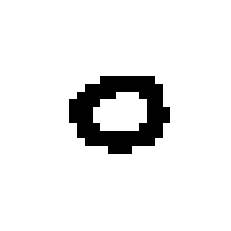

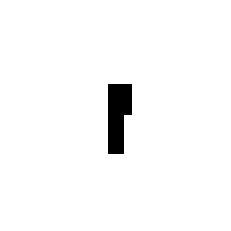

In [78]:
#확인
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in [0,2600,5032]:
    some_digit = new_X[i]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")

    #save_fig("some_digit_plot")
    plt.show()


# 원본MNIST 데이터와 새로운 데이터 병합

In [95]:
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X_train_, X_test, y_train_, y_test = train_test_split(mnist["data"], mnist["target"],test_size=0.2, random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_, y_train_,test_size=0.25, random_state=42)
print(len(X_train),len(y_valid),len(y_test))

42000 14000 14000


In [94]:
len(new_X)

16400

In [96]:
x,x_,y,y_=train_test_split(new_X,new_y,test_size=0.2,random_state=42)
x,xvalid,y,yvalid=train_test_split(x,y,test_size=0.25,random_state=42)
print(len(x),len(xvalid))
X_train=np.concatenate((X_train, x), axis=0)
y_train=np.concatenate((y_train, y), axis=0)
X_valid=np.concatenate((X_valid, xvalid), axis=0)
y_valid=np.concatenate((y_valid, yvalid), axis=0)
X_test=np.concatenate((X_test, x_), axis=0)
y_test=np.concatenate((y_test, y_), axis=0)

9840 3280


In [97]:
print(len(X_train),len(y_train),len(X_valid),len(y_valid),len(X_test),len(y_test))

51840 51840 17280 17280 17280 17280


# 모델 평가 및 선정

grid search 및 learning curve는 첨부파일 참조

# Random Forest

In [142]:
rnd_clf = RandomForestClassifier(max_depth=17, n_estimators=500,random_state=42)
time1=time.time()
rnd_clf.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
rnd_clf.score(X_valid,y_valid)

학습시간 : 167.49747228622437


0.9419560185185185

In [143]:
rnd_clf.score(X_test,y_test)

0.9389467592592593

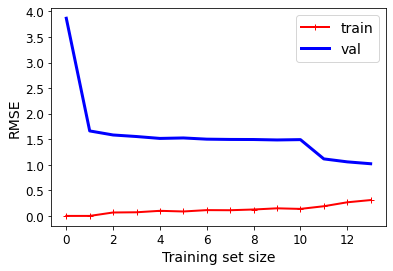

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_learning_curves(model, X_,X_valid,y_,y_valid):
    X_train, X_val, y_train, y_val = X_,X_valid,y_,y_valid
    train_errors, val_errors = [], []
    for m in range(1, 52002,4000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
plot_learning_curves(rnd_clf,X_train,X_valid,y_train,y_valid)
               # not shown in the book
plt.show()                                      # not shown

# SGD

In [85]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=300, tol=1e-3, loss='log',random_state=42)
time1=time.time()
sgd_clf.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
sgd_clf.score(X_valid,y_valid)

학습시간 : 216.3063189983368


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7309606481481481

# KNN(socoring 시간 오래걸림)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf1 = KNeighborsClassifier(weights='distance', n_neighbors = 3, leaf_size = 10 )
time1=time.time()
knn_clf1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)

학습시간 : 39.2401328086853


# SoftMax

In [60]:
from sklearn.linear_model import LogisticRegression
softmax_reg_1 = LogisticRegression(multi_class="multinomial", C=0.001, random_state=42)
softmax_reg_1.fit(X_train, y_train)
time1=time.time()
softmax_reg_1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
softmax_reg_1.score(X_valid,y_valid)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습시간 : 23.729557037353516


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8205439814814814

# Voting 시도

In [145]:
from sklearn.ensemble import VotingClassifier

voting_clf_1 = VotingClassifier(estimators=[('rnd', rnd_clf),('log', softmax_reg_1),('sgd',sgd_clf)], voting='hard')
time1=time.time()
voting_clf_1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
voting_clf_1.score(X_valid,y_valid)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


학습시간 : 301.9377176761627


0.8619212962962963

In [146]:
from sklearn.ensemble import VotingClassifier

voting_clf_1 = VotingClassifier(estimators=[('rnd', rnd_clf),('log', softmax_reg_1),('sgd',sgd_clf)], voting='soft')
time1=time.time()
voting_clf_1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
voting_clf_1.score(X_valid,y_valid)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


학습시간 : 313.66132616996765


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:327: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.7341435185185186

In [149]:
voting_clf_1 = VotingClassifier(estimators=[('rnd', rnd_clf),('log', softmax_reg_1)], voting='soft')
time1=time.time()
voting_clf_1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
voting_clf_1.score(X_valid,y_valid)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습시간 : 188.89919805526733


0.8891203703703704

In [150]:
voting_clf_1 = VotingClassifier(estimators=[('rnd', rnd_clf),('log', softmax_reg_1)], voting='hard')
time1=time.time()
voting_clf_1.fit(X_train,y_train)
time2=time.time()
print("학습시간 :", time2-time1)
voting_clf_1.score(X_valid,y_valid)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습시간 : 180.9268114566803


0.8876157407407408

# 결과가 RandomForest 단독으로 사용했을때보다 좋지 못하게 나온다 

# score가 94를 넘는 Randomforest 모델을 선정